In [2]:
import numpy as np
import yaml, os
from sys import path
from pathlib import Path
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

path.append("opereira/starships/cc_scripts/")

import cc_scripts.reduction as red
import cc_scripts.make_model as mod
import cc_scripts.correlations as corr

from importlib import reload
# red = reload(red)

# unpack 'H2O_main_iso' yaml file
config_filepath_h20_main_iso = 'config_h20_main_iso.yaml'
with open(config_filepath_h20_main_iso, 'r') as file:
    config_dict_h20_main_iso = yaml.safe_load(file)

config_dict_h20_main_iso['obs_dir'] = Path.home() / Path(config_dict_h20_main_iso['obs_dir'])

# unpacking 'H2O' yaml file
config_filepath_h20 = 'config_h20.yaml'
with open(config_filepath_h20, 'r') as file:
    config_dict_h20 = yaml.safe_load(file)

config_dict_h20['obs_dir'] = Path.home() / Path(config_dict_h20['obs_dir'])

# creating the planet and observation objects
planet_h20, obs_h20 = red.load_planet(config_dict_h20)
planet_h20_main_iso, obs_h20_main_iso = red.load_planet(config_dict_h20_main_iso)

INFO:starships.planet_obs:Getting WASP-127 b from ExoFile
INFO:starships.planet_obs:Fetching the uncorrected spectra
INFO:starships.planet_obs:File: list_e2ds


Changing M_star from [2.14748266e+30] kg to 1.8889893771631484e+30 kg
It became [1.88898938e+30] kg
Changing R_star from [9.67023e+08] m to 927368100.0 m
It became [9.273681e+08] m
Changing M_pl from [3.12621121e+26] kg to 3.131905585604484e+26 kg
It became [3.13190559e+26] kg
Changing R_pl from [93726012.] m to 93726012.0 m
It became [93726012.] m
Changing RV_sys from [0.] km / s to -8.86 km / s
It became [-8.86] km / s
Changing mid_tr from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing t_peri from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing trandur from [15670.368] s to 4.3529 h
It became [15670.44] s
Changing period from [360984.827232] s to 4.1780625 d
It became [360984.6] s
Changing excent from 0.0 to 0.0
It became 0.0
Changing incl from [1.5393804] rad to 87.84 deg
It became [1.53309721] rad
Changing Teff from [5620.] K to 5842
It became [5842.] K
Changing Tp from [1400.] K to 1400.0 K
It became [1400.] K
Changing

INFO:starships.planet_obs:Fetching data
INFO:starships.planet_obs:File: list_tellu_corrected
INFO:starships.planet_obs:Fetching the tellurics
INFO:starships.planet_obs:File: list_tellu_recon
INFO:starships.planet_obs:Getting WASP-127 b from ExoFile
INFO:starships.planet_obs:Fetching the uncorrected spectra
INFO:starships.planet_obs:File: list_e2ds


Changing M_star from [2.14748266e+30] kg to 1.8889893771631484e+30 kg
It became [1.88898938e+30] kg
Changing R_star from [9.67023e+08] m to 927368100.0 m
It became [9.273681e+08] m
Changing M_pl from [3.12621121e+26] kg to 3.131905585604484e+26 kg
It became [3.13190559e+26] kg
Changing R_pl from [93726012.] m to 93726012.0 m
It became [93726012.] m
Changing RV_sys from [0.] km / s to -8.86 km / s
It became [-8.86] km / s
Changing mid_tr from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing t_peri from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing trandur from [15670.368] s to 4.3529 h
It became [15670.44] s
Changing period from [360984.827232] s to 4.1780625 d
It became [360984.6] s
Changing excent from 0.0 to 0.0
It became 0.0
Changing incl from [1.5393804] rad to 87.84 deg
It became [1.53309721] rad
Changing Teff from [5620.] K to 5842
It became [5842.] K
Changing Tp from [1400.] K to 1400.0 K
It became [1400.] K
Changing

INFO:starships.planet_obs:Fetching data
INFO:starships.planet_obs:File: list_tellu_corrected
INFO:starships.planet_obs:Fetching the tellurics
INFO:starships.planet_obs:File: list_tellu_recon


INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:Adding H2O_main_iso to species_list
INFO:starships.petitradtrans_utils:['H2O_main_iso']


['H2O_main_iso']


/home/opereira/.venvs/starships-env/lib/python3.11/site-packages/petitRADTRANS/radtrans.py:100: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



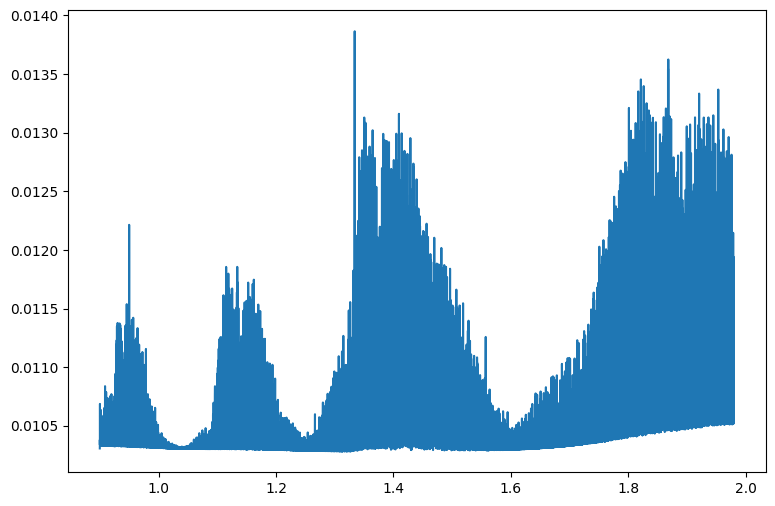

In [3]:
print(config_dict_h20_main_iso['line_opacities'])
# computing extra parameters needed for model making
int_dict_h20_main_iso = mod.create_internal_dict(config_dict_h20_main_iso, planet_h20_main_iso)

# create the model
wave_mod_h20_main_iso, mod_spec_h20_main_iso = mod.prepare_model_high_or_low(config_dict_h20_main_iso, int_dict_h20_main_iso, planet_h20_main_iso)

plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso)

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:['H2O_main_iso']


['H2O']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



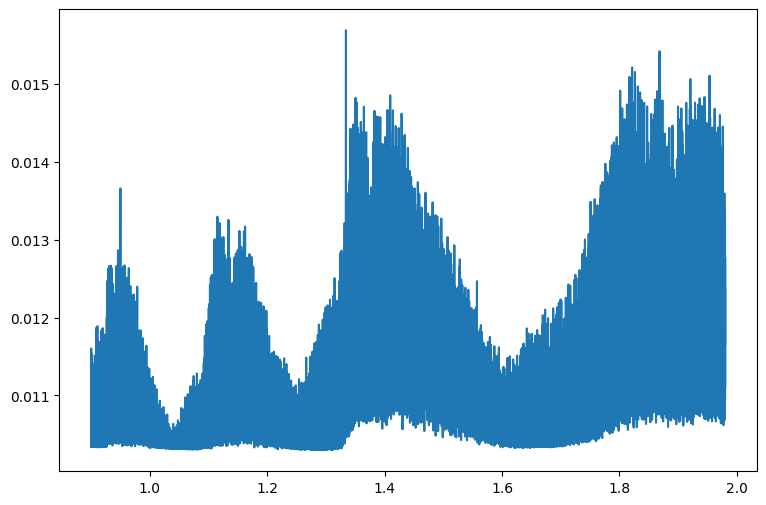

In [4]:
print(config_dict_h20['line_opacities'])

# computing extra parameters needed for model making
int_dict_h20 = mod.create_internal_dict(config_dict_h20, planet_h20)

# create the model
wave_mod_h20, mod_spec_h20 = mod.prepare_model_high_or_low(config_dict_h20, int_dict_h20, planet_h20)

plt.plot(wave_mod_h20, mod_spec_h20)

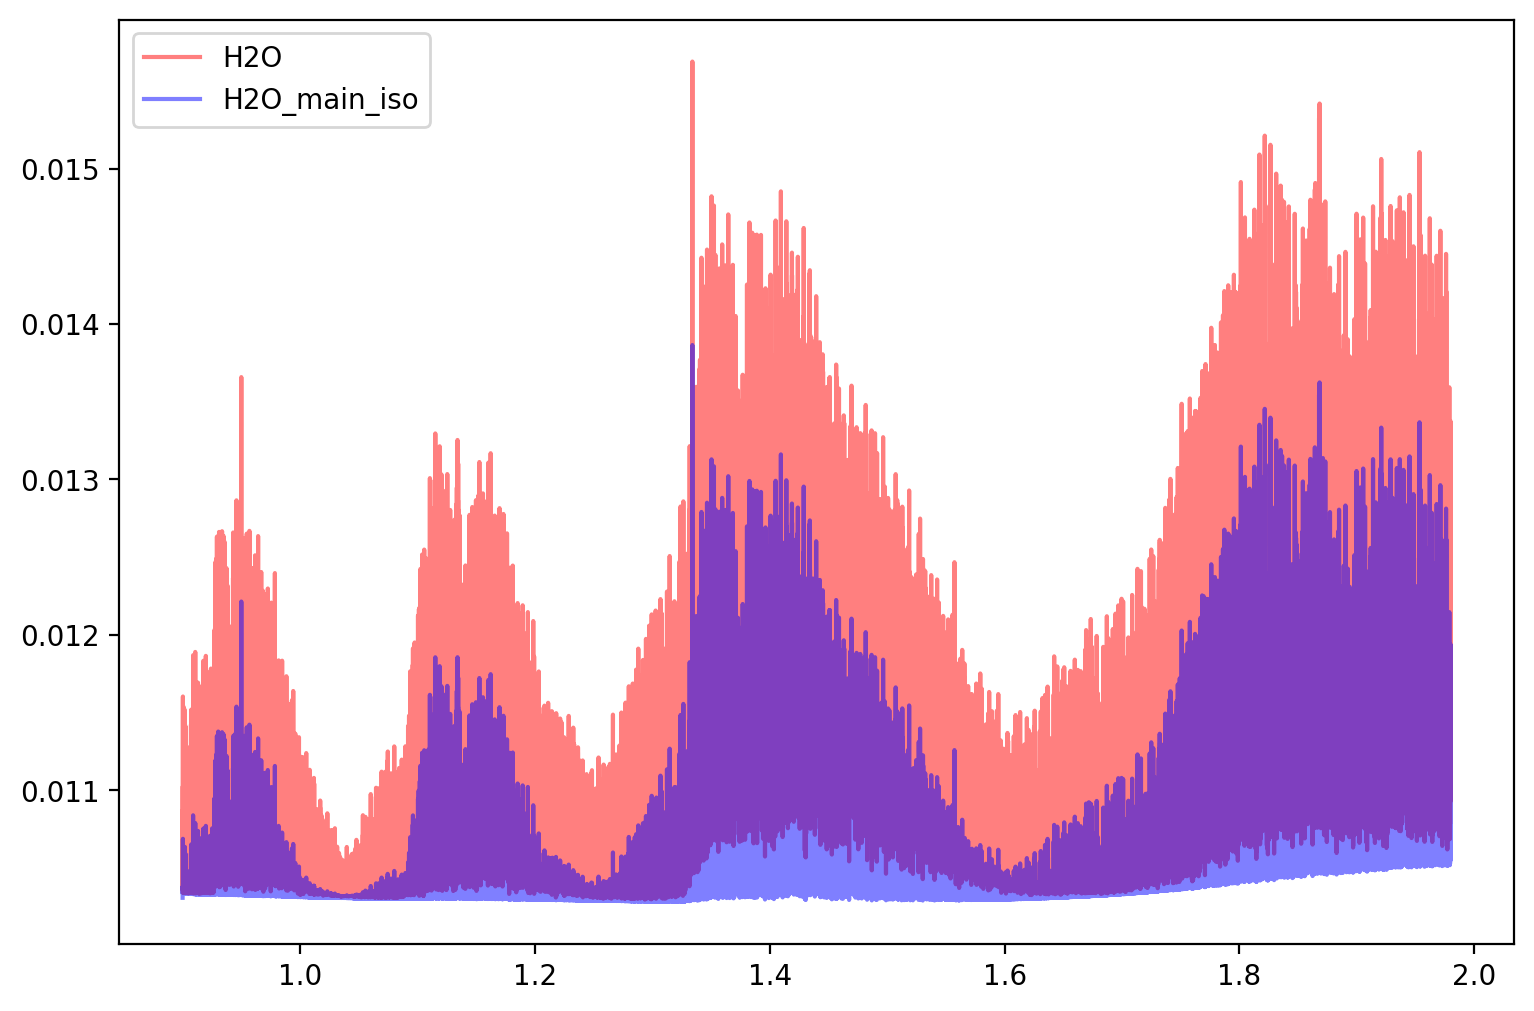

In [5]:
plt.figure(dpi = 200)
plt.plot(wave_mod_h20, mod_spec_h20, alpha = 0.5, color = 'red', label = 'H2O')
plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso, alpha = 0.5, color = 'blue', label = 'H2O_main_iso')
plt.legend()

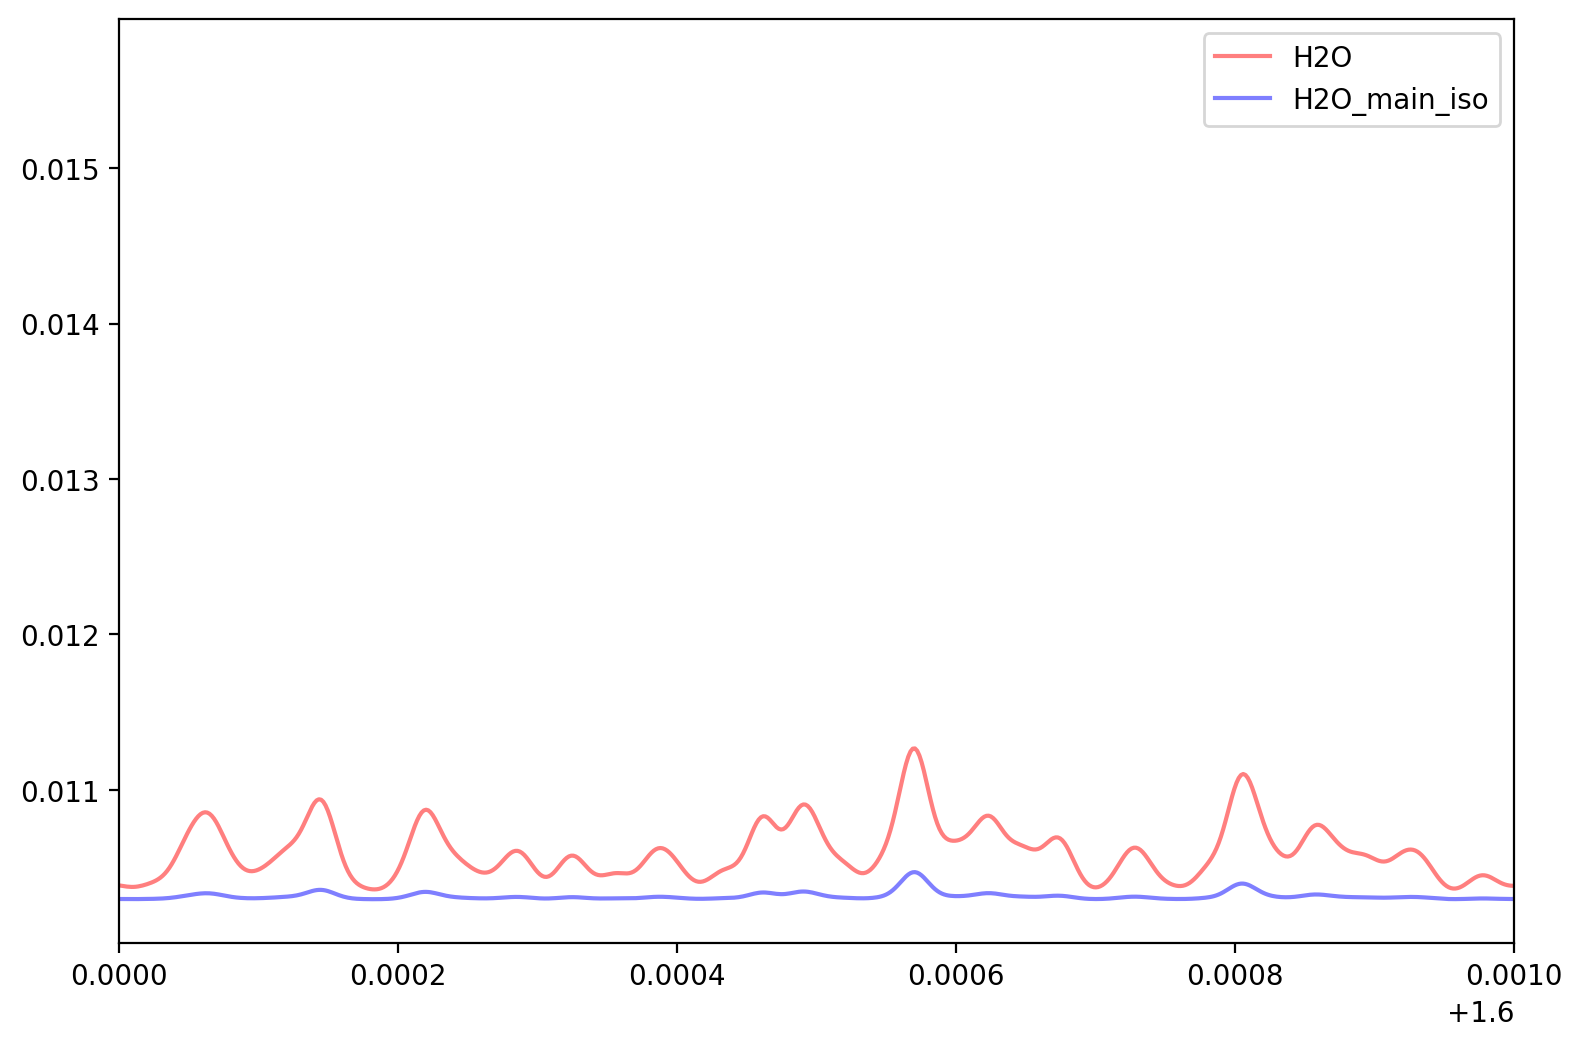

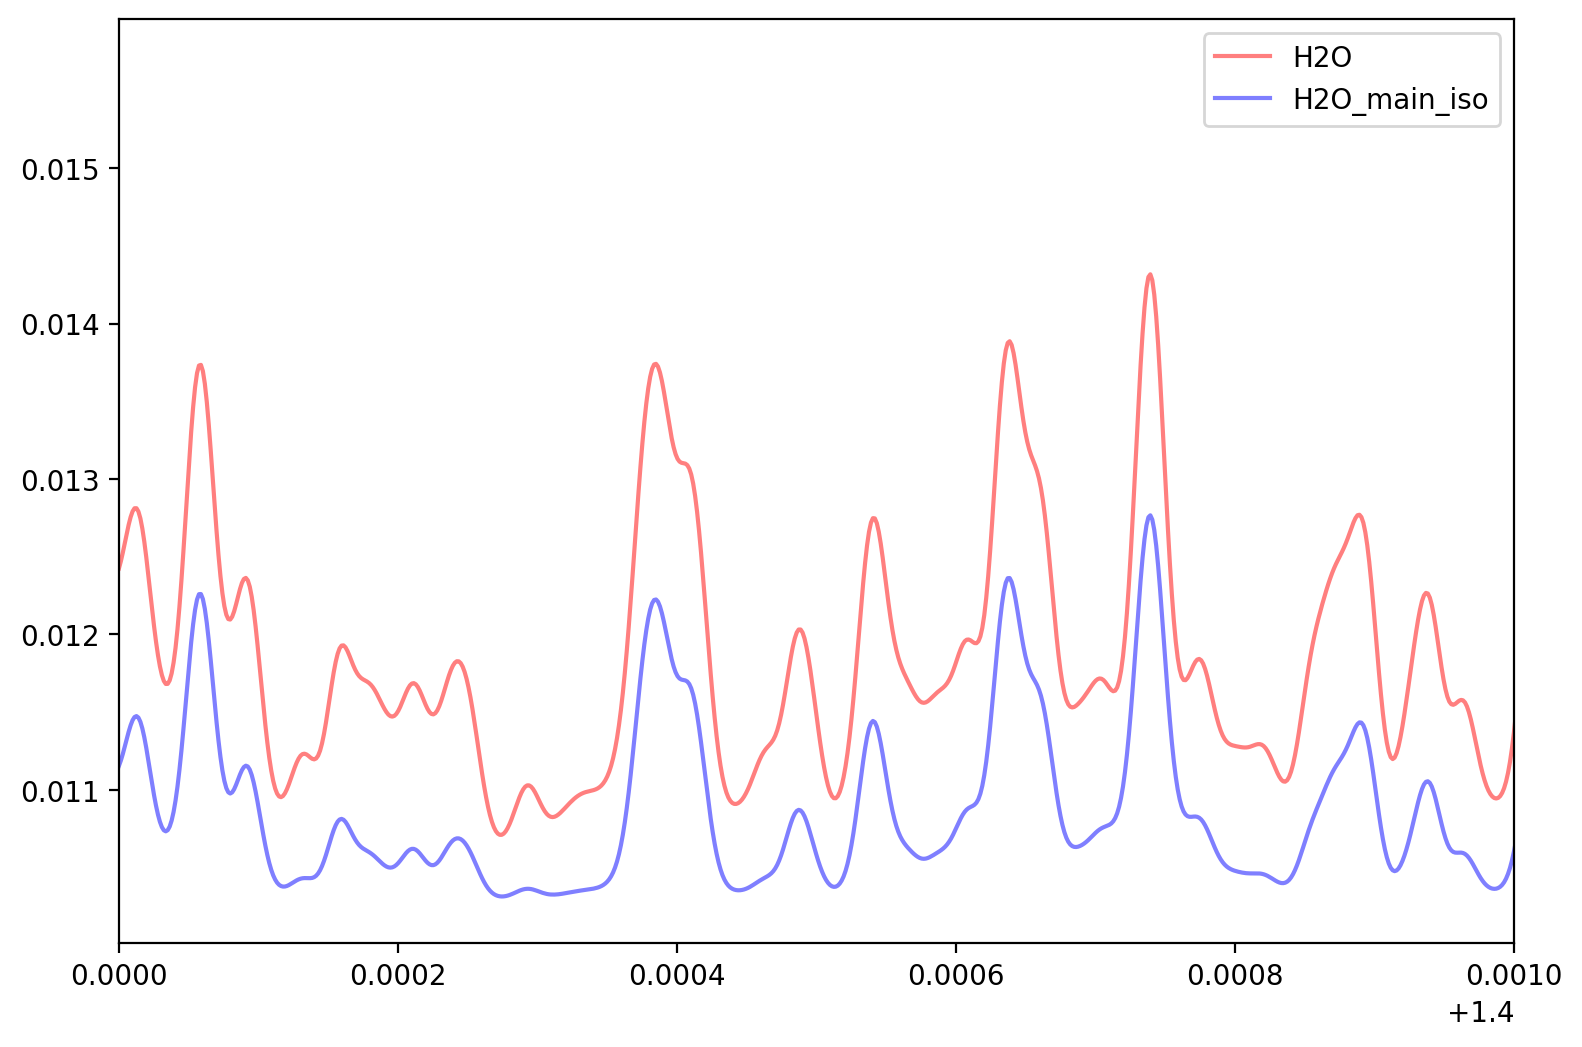

In [6]:
plt.figure(dpi = 200)
plt.plot(wave_mod_h20, mod_spec_h20, alpha = 0.5, color = 'red', label = 'H2O')
plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso, alpha = 0.5, color = 'blue', label = 'H2O_main_iso')

# ZOOM IN HERE:
plt.xlim(1.6, 1.601)
plt.legend()
plt.show()

plt.figure(dpi = 200)
plt.plot(wave_mod_h20, mod_spec_h20, alpha = 0.5, color = 'red', label = 'H2O')
plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso, alpha = 0.5, color = 'blue', label = 'H2O_main_iso')

# ZOOM IN HERE:
plt.xlim(1.4, 1.401)
plt.legend()
plt.show()



INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:Adding H2O_main_iso to species_list
INFO:starships.petitradtrans_utils:['H2O_main_iso']


current line_opacities value:  ['H2O_main_iso']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



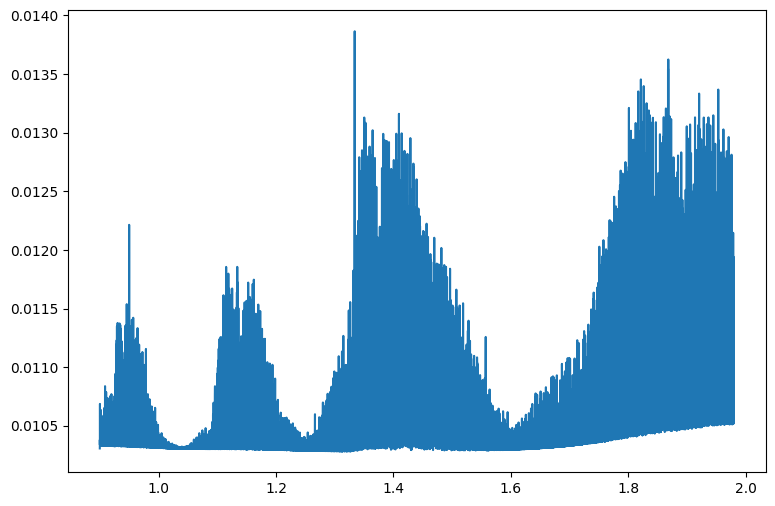

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:['H2O_main_iso']


current line_opacities value:  ['H2O']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



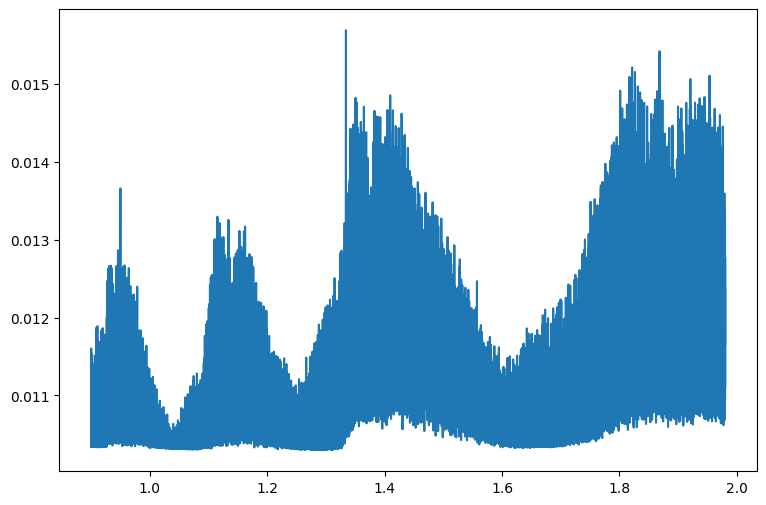

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:Adding H2O_main_iso to species_list
INFO:starships.petitradtrans_utils:['H2O_main_iso']


current line_opacities value:  ['H2O_main_iso']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



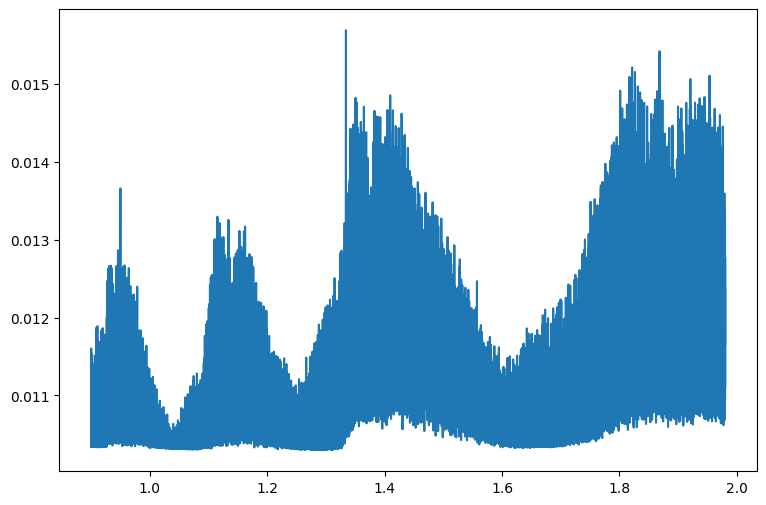

In [7]:
print('current line_opacities value: ', config_dict_h20_main_iso['line_opacities'])

int_dict_h20_main_iso = mod.create_internal_dict(config_dict_h20_main_iso, planet_h20_main_iso)
wave_mod_h20_main_iso, mod_spec_h20_main_iso = mod.prepare_model_high_or_low(config_dict_h20_main_iso, int_dict_h20_main_iso, planet_h20_main_iso)
plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso)
plt.show()


# changing the value to H2O
config_dict_h20_main_iso['line_opacities'] = ['H2O']
print('current line_opacities value: ', config_dict_h20_main_iso['line_opacities'])
int_dict_h20_main_iso = mod.create_internal_dict(config_dict_h20_main_iso, planet_h20_main_iso)
wave_mod_h20_main_iso, mod_spec_h20_main_iso = mod.prepare_model_high_or_low(config_dict_h20_main_iso, int_dict_h20_main_iso, planet_h20_main_iso)
plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso)
plt.show()


# changing back to H2O_main_iso
config_dict_h20_main_iso['line_opacities'] = ['H2O_main_iso']
print('current line_opacities value: ', config_dict_h20_main_iso['line_opacities'])
int_dict_h20_main_iso = mod.create_internal_dict(config_dict_h20_main_iso, planet_h20_main_iso)
wave_mod_h20_main_iso, mod_spec_h20_main_iso = mod.prepare_model_high_or_low(config_dict_h20_main_iso, int_dict_h20_main_iso, planet_h20_main_iso)
plt.plot(wave_mod_h20_main_iso, mod_spec_h20_main_iso)
plt.show()

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:['H2O_main_iso']


['H2O']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



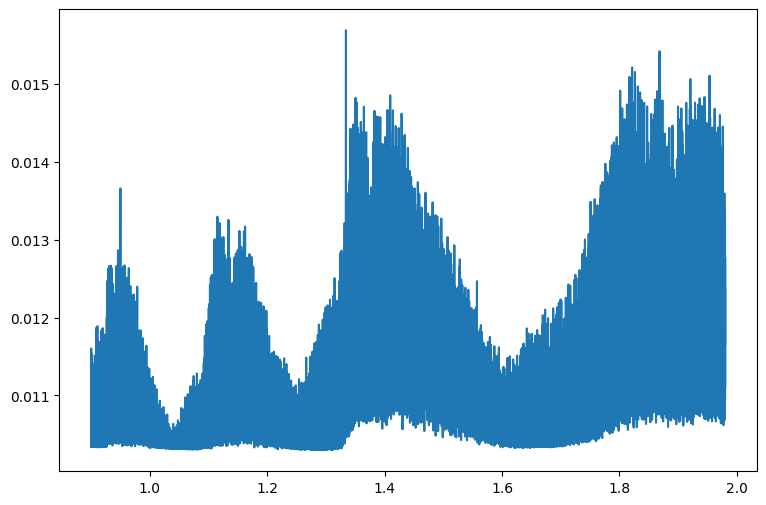

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:Adding H2O_main_iso to species_list
INFO:starships.petitradtrans_utils:['H2O_main_iso']


['H2O_main_iso']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



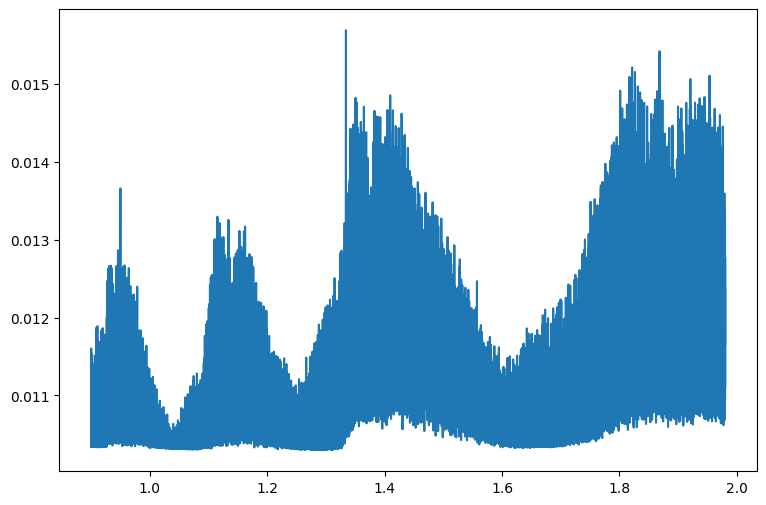

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:['H2O_main_iso']


['H2O']
  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



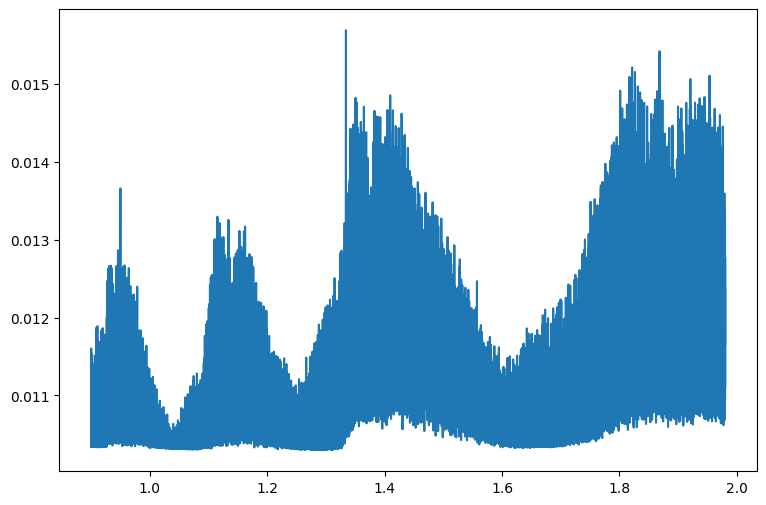

In [8]:
print(config_dict_h20['line_opacities'])
int_dict_h20 = mod.create_internal_dict(config_dict_h20, planet_h20)
wave_mod_h20, mod_spec_h20 = mod.prepare_model_high_or_low(config_dict_h20, int_dict_h20, planet_h20)
plt.plot(wave_mod_h20, mod_spec_h20)
plt.show()

# changing to h20_main_iso
config_dict_h20['line_opacities'] = ['H2O_main_iso']
print(config_dict_h20['line_opacities'])
int_dict_h20 = mod.create_internal_dict(config_dict_h20, planet_h20)
wave_mod_h20, mod_spec_h20 = mod.prepare_model_high_or_low(config_dict_h20, int_dict_h20, planet_h20)
plt.plot(wave_mod_h20, mod_spec_h20)
plt.show()

# changing back to h20
config_dict_h20['line_opacities'] = ['H2O']
print(config_dict_h20['line_opacities'])
int_dict_h20 = mod.create_internal_dict(config_dict_h20, planet_h20)
wave_mod_h20, mod_spec_h20 = mod.prepare_model_high_or_low(config_dict_h20, int_dict_h20, planet_h20)
plt.plot(wave_mod_h20, mod_spec_h20)
plt.show()